In [24]:
#Libraries:

import pandas as pd
import numpy as np
import pprint
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("../Data/realtor-data.csv")

In [15]:
df.head()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0


In [26]:
df.dtypes

status             object
bed               float64
bath              float64
acre_lot          float64
city               object
state              object
zip_code          float64
house_size        float64
prev_sold_date     object
price             float64
dtype: object

In [16]:
num_rows, num_columns = df.shape

print("Number of Rows:", num_rows)
print("Number of Columns:", num_columns)

Number of Rows: 1104666
Number of Columns: 10


In [17]:
columns_with_nulls = df.columns[df.isnull().any()]
null_counts = df[columns_with_nulls].isnull().sum().sort_values(ascending=False)

print("Columns with the most null values:")
print(null_counts)

Columns with the most null values:
prev_sold_date    538650
house_size        370844
acre_lot          339875
bed               146716
bath              124576
zip_code             214
city                  81
price                 73
dtype: int64


In [18]:
df.describe()

,bed,bath,acre_lot,zip_code,house_size,price
count,957950.000000,980090.000000,764791.000000,1.104452e+06,7.338220e+05,1.104593e+06
mean,3.330949,2.498622,14.901800,7.228656e+03,2.147604e+03,9.109764e+05
std,2.078501,1.934373,889.496988,3.824027e+03,2.984668e+03,2.927292e+06
min,1.000000,1.000000,0.000000,6.010000e+02,1.000000e+02,0.000000e+00
25%,2.000000,1.000000,0.110000,3.835000e+03,1.110000e+03,2.800000e+05
50%,3.000000,2.000000,0.260000,7.405000e+03,1.647000e+03,4.999000e+05
75%,4.000000,3.000000,1.040000,1.045600e+04,2.500000e+03,8.699000e+05
max,123.000000,198.000000,100000.000000,9.999900e+04,1.450112e+06,8.750000e+08


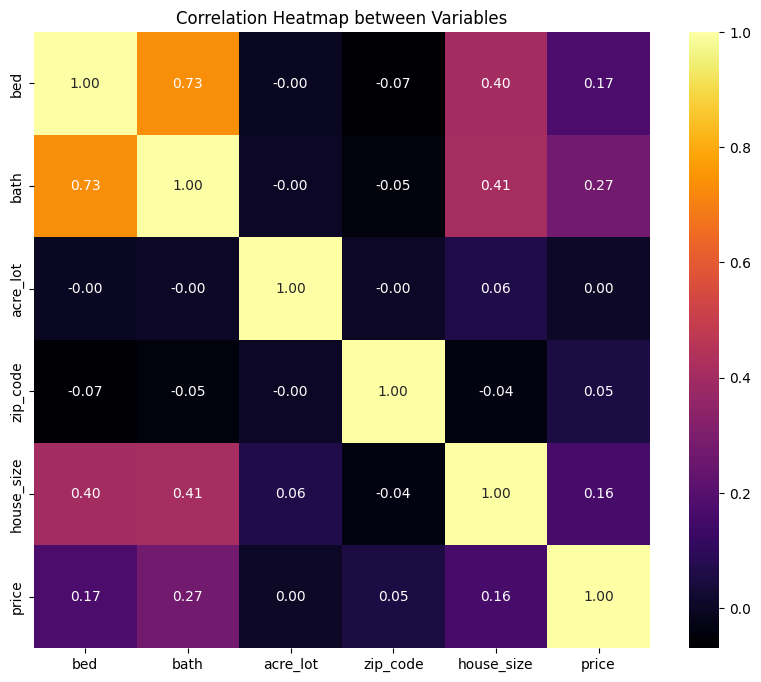

In [25]:
subset_corr = df[['bed', 'bath', 'acre_lot', 'zip_code', 'house_size', 'price']]
correlation_matrix = subset_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="inferno", fmt=".2f", square=True)
plt.title("Correlation Heatmap between Variables")
plt.show()


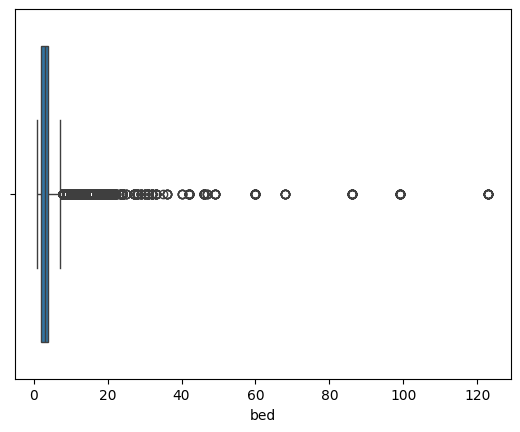

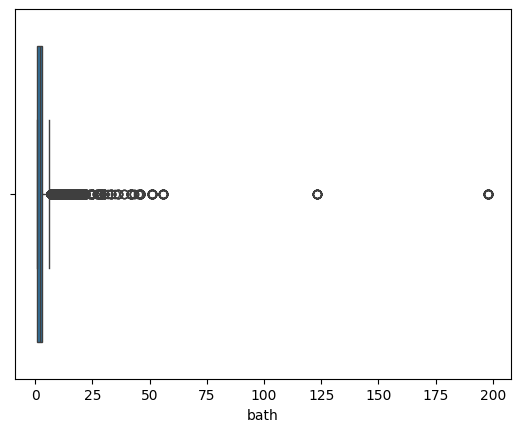

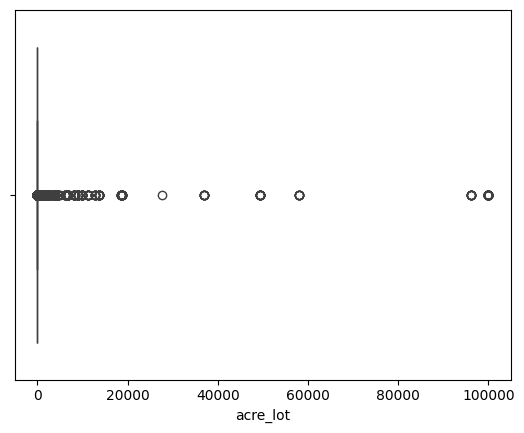

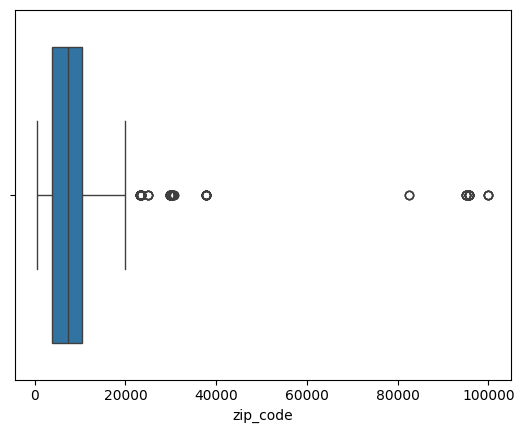

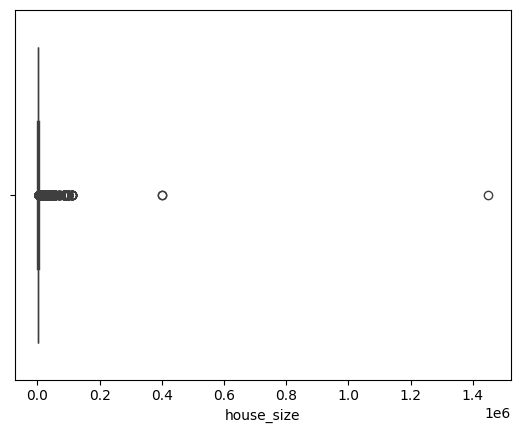

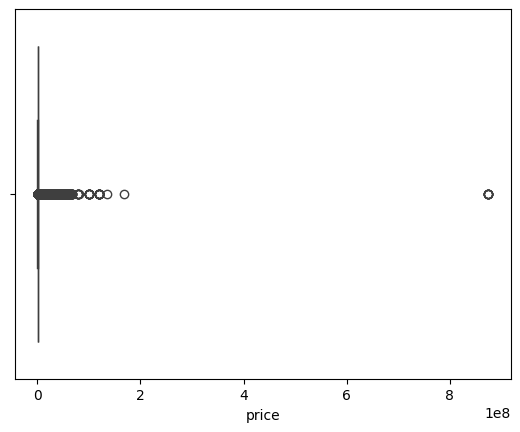

In [33]:
# Box plots for numerical columns
for col in df.select_dtypes(include='number').columns:
    sns.boxplot(x=col, data=df)
    plt.show()


In [ ]:
"""
Conclusions on what we can observe from the exploration:

- float columns that need to be int
- Observe on how will the null values will afect the predictive model
-Basic amount of columns but really high amount of rows
- Based on the correlation heatmap and other factors no columns need to be dropped.
-As we can observe there are some outliers which will be conserved in the first place too keep a larger representative model in case of luxury houses.

"""